In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import models, layers
import matplotlib.pyplot as plt
import numpy as np

IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 100


class_names = dataset.class_names

train_size=0.8

train_ds=dataset.take(54)

test_ds=dataset.skip(54)

val_size=0.1

val_ds=test_ds.take(6)

test_ds=test_ds.skip(6)


def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

train_ds, val_ds, test_ds=get_dataset_partitions_tf(dataset)

train_ds= train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds= val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds= test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)


import tensorflow as tf
#from tensorflow import keras
from keras.models import load_model


savedModel1 = load_model('D:/saved_models5/RC_Model_5.h5')

savedModel2 = load_model('D:/TL/MTL1.h5')







NameError: ignored

In [ ]:
data2= tf.keras.preprocessing.image_dataset_from_directory(
"D:\M2_Test_RC",
   shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE)
    batch_size=BATCH_SIZE
)

class_names2 = data2.class_names

data1= tf.keras.preprocessing.image_dataset_from_directory(
"D:\Test_RC",
   shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

class_names1 = data1.class_names

Found 1165 files belonging to 2 classes.
Found 1335 files belonging to 3 classes.


In [ ]:
def predict(model1, model2, img): #RAA NET
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0) # Creating  a batche
    
    predictions_1 = model1.predict(img_array)
    predictions_2 = model2.predict(img_array)

    
    predicted_class_1 = class_names1 [np.argmax(predictions_1[0])]
    confidence_1 = round(100 * (np.max(predictions_1[0])), 2)

    predicted_class_2 = class_names2 [np.argmax(predictions_2[0])]
    confidence_2 = round(100 * (np.max(predictions_2[0])), 2)

    """if (confidence_1 > confidence_2):
        predicted_class = predicted_class_1
        confidence = confidence_1
    else:
        predicted_class = predicted_class_2
        confidence = confidence_2"""

    return predicted_class_1, confidence_1, predicted_class_2, confidence_2

1/1 [==============================] - 0s 48ms/step


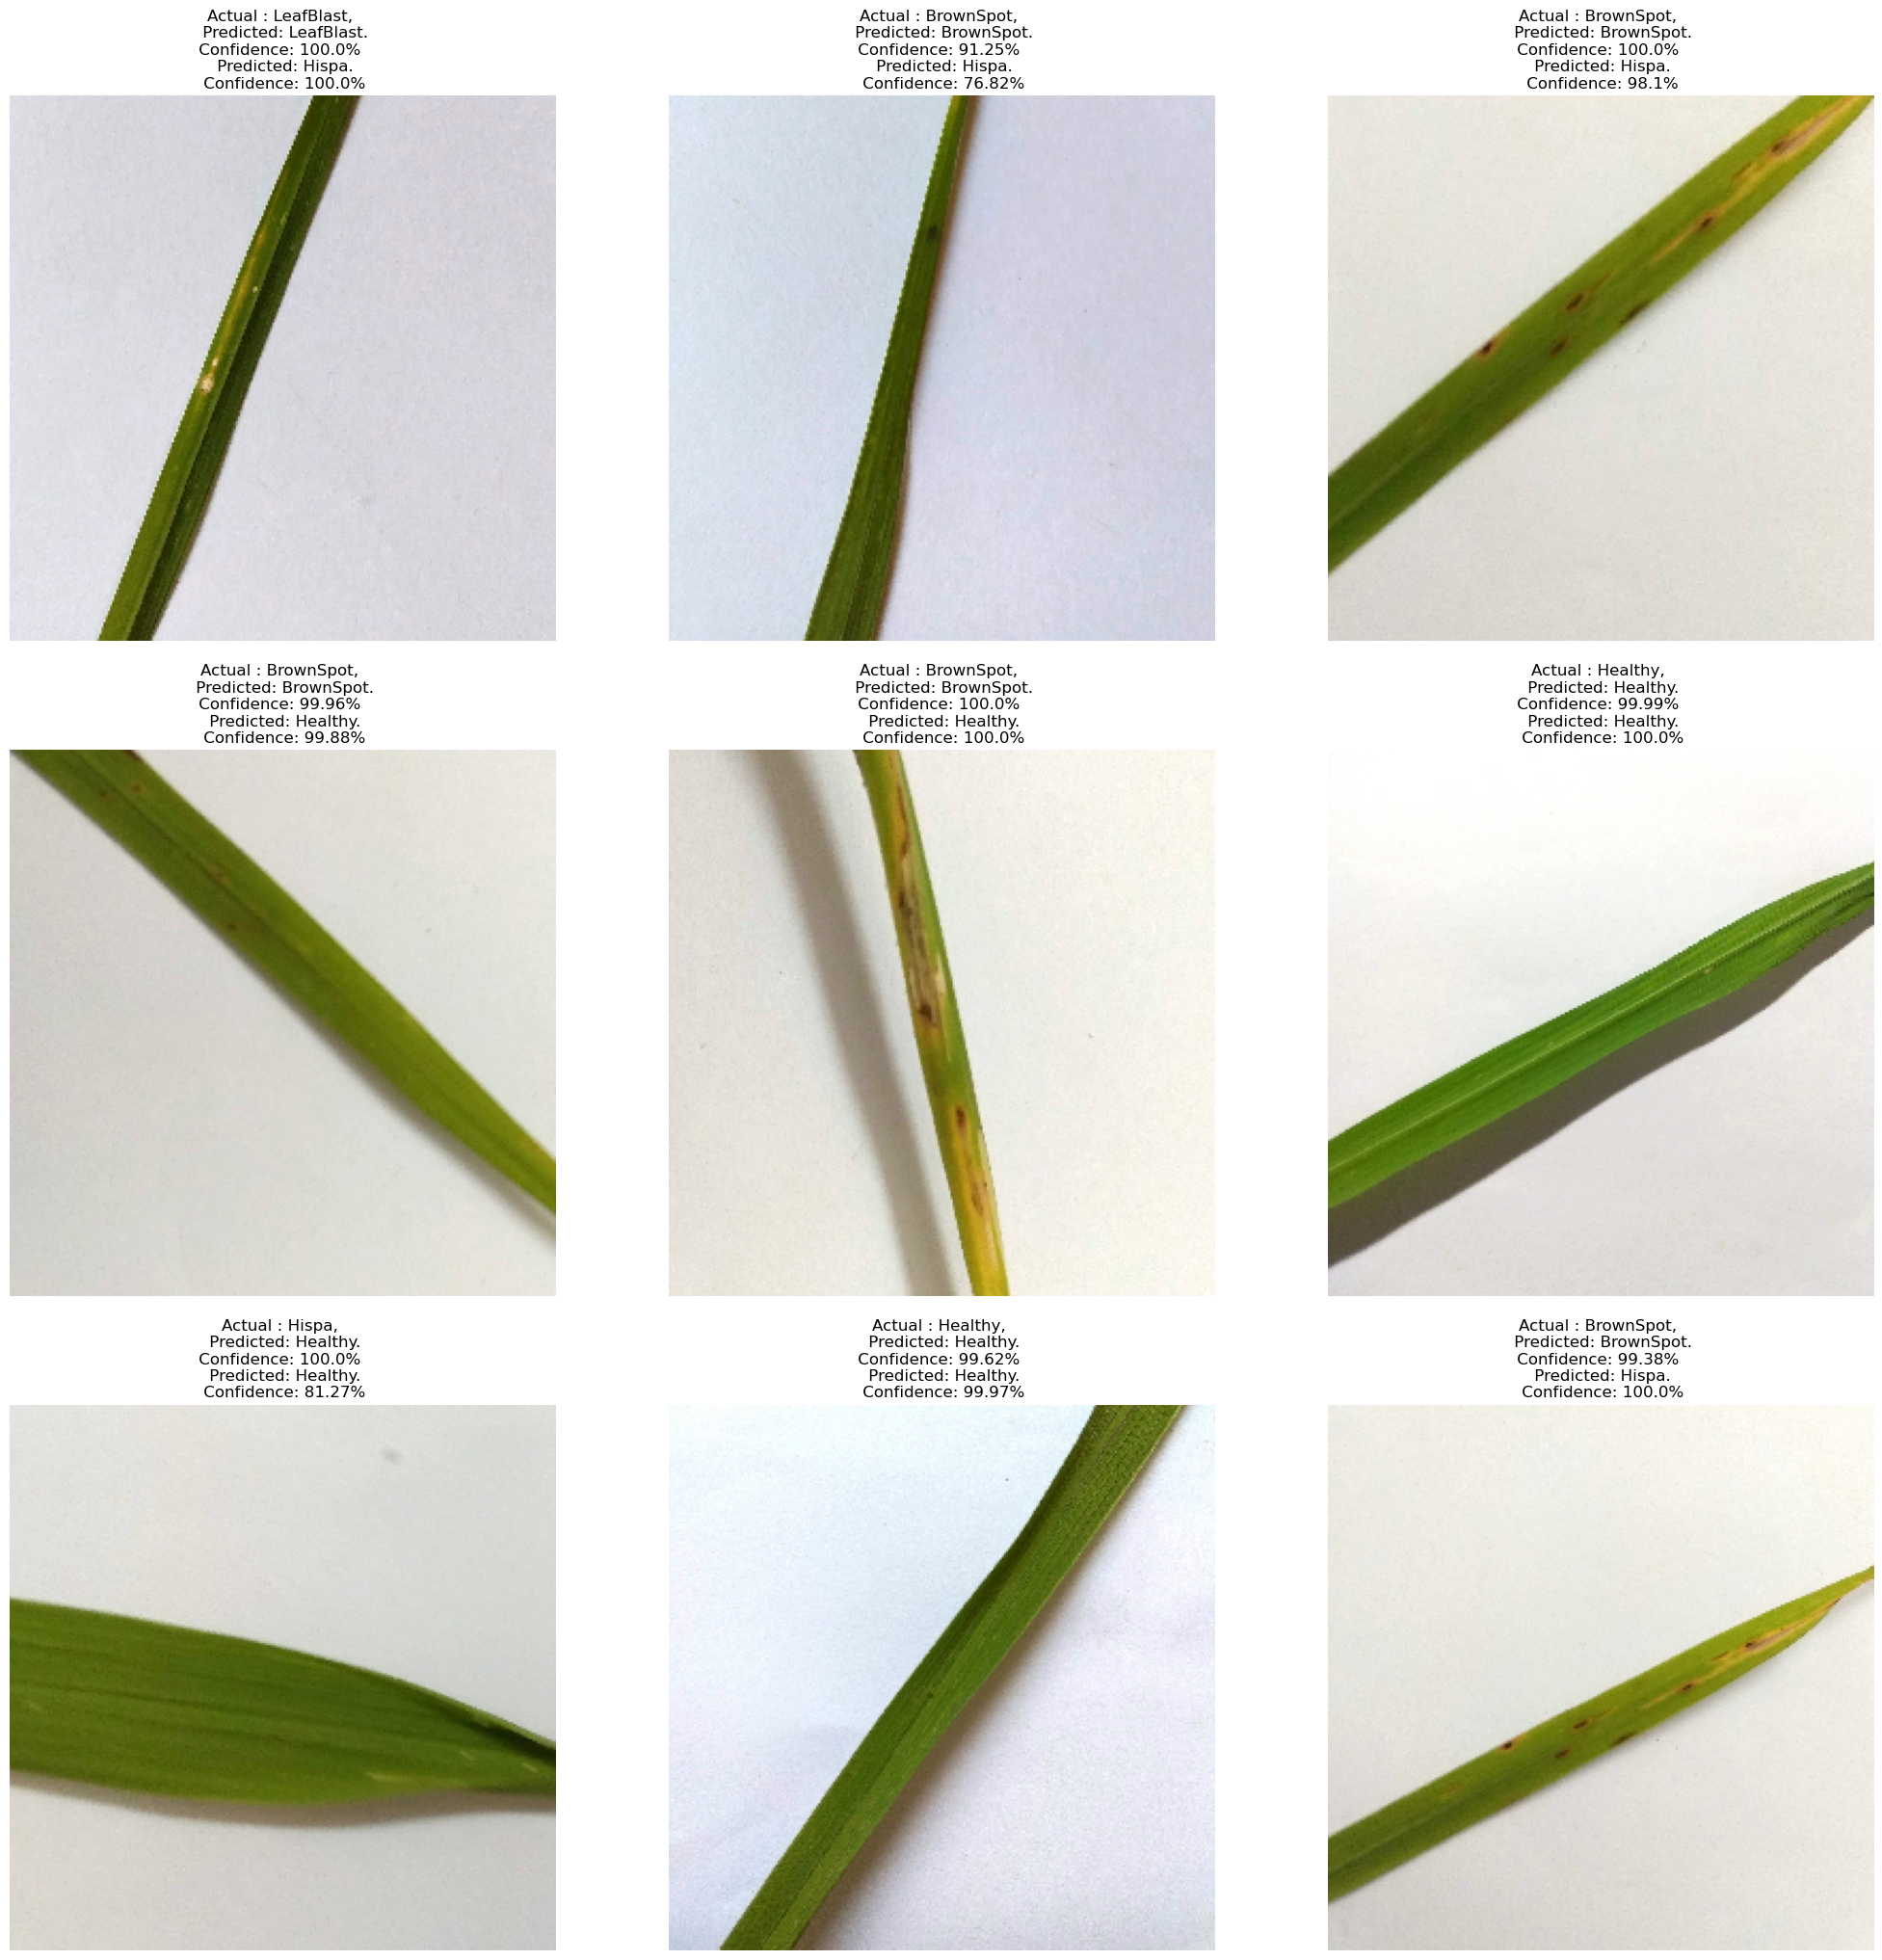

In [ ]:
plt.figure(figsize=(25,25))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class_1, confidence_1, predicted_class_2, confidence_2 = predict(savedModel1, savedModel2, images[i].numpy()) 
        actual_class = class_names[labels[i]]
        
        plt.title(f"Actual : {actual_class}, \n Predicted: {predicted_class_1}.\n Confidence: {confidence_1}%  \n Predicted: {predicted_class_2}.\n Confidence: {confidence_2}%")
        plt.axis("off")